## what does affect the prosper borrower rate ?


## Investigation Overview

> on this investigation I want to look on the characterstics that affect the prosper borrower rate, the main focus was on
* the prosperscore  
* isborrowerhome owner 
* listing category 
* term of the loan

## Dataset Overview

> the whole data in first contains 113937 rows but as some data was collected or features were added after july 2017 the number of entries become 84853 loans with 81 feature associated with each loan,
> Not all of the features were important for my analysis, the ones were important was mentioned the slide before

In [89]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [90]:
# load in the dataset into a pandas dataframe
df2 = pd.read_csv('prosperLoanData.csv')
df = df2[df2['ListingCreationDate']>='2009-07-01']
ordinal_var_dict = {'EmploymentStatus': ['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'],
                    'LoanStatus': ['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'],'IncomeRange':['$50,000-74,999', '$25,000-49,999', '$100,000+', '$75,000-99,999',
       '$1-24,999', 'Not employed', '$0']
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df[var] = df[var].astype(ordered_var)

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

##  Distribution of Prosperscore
> This is a distribution of the prosperscore and it looks like normal distribution but there are some peaks at 4,6,8 the distribution tells us a lot on the prosperscore and how they are distributed

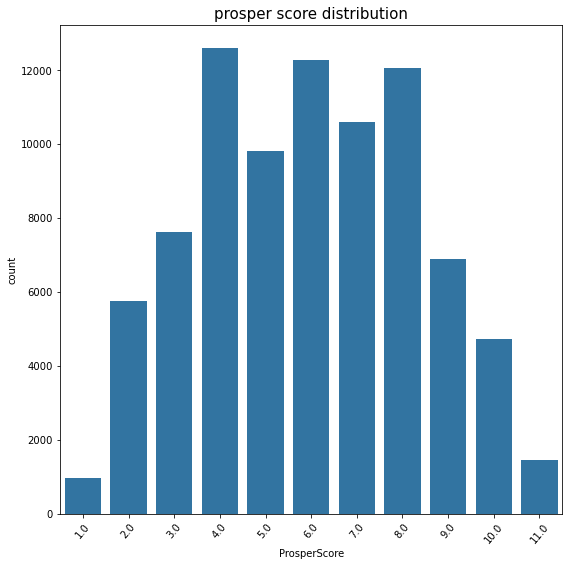

In [91]:
plt.subplots( figsize = [9,9])

sb.countplot(data = df , x='ProsperScore',color=sb.color_palette()[0])
#plt.xlim([0,8])

plt.xticks(rotation = 50)
plt.title('prosper score distribution',size=15);

## Distribution of borrower rates

> This is the distribution of the borrower rate and it is a little right skewed saying that a much portions of people taking a small borrower rate which is 0.20 or smaller

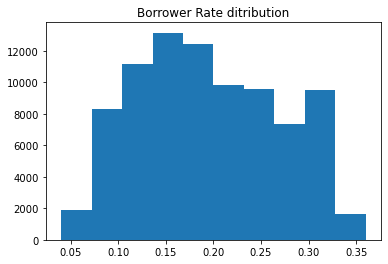

In [92]:
plt.hist(df.BorrowerRate)
plt.title('Borrower Rate ditribution');

## Distribution of  loan Terms 

>the loan terms here in our data provided by prosper are 3 categories which is 12 months , 36 months , 60 months
what we found in the analysis that most of the loans are 36 months which mean 3 years loan

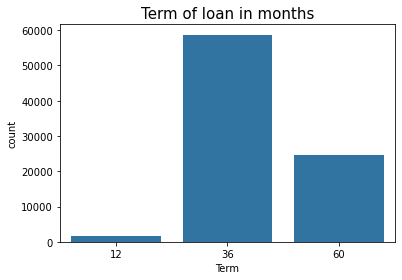

In [93]:
sb.countplot(data = df , x='Term',color=sb.color_palette()[0])
plt.title('Term of loan in months',size=15);

## Distribution of  listing categories 
>here is a representation of the listing categories where each number represent a certain category saying the reason for the loan
* 1 is Debt Consolidation
* 2 is Home Improvement. 
* 3 is Business
* 6 is Auto

>it is clear that the above these are the most categories we have as a reason for a loan

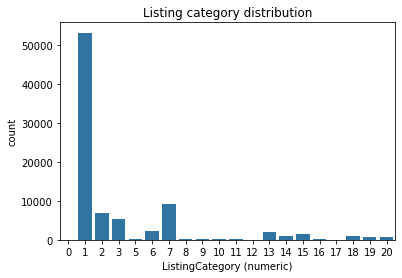

In [94]:
sb.countplot(data = df , x='ListingCategory (numeric)',color = sb.color_palette()[0])
plt.title('Listing category distribution');

## Distribution of borrower rate versus Term
>Firstly,This distribution tells us a lot it tells us that owning your home will make your average borrowing rate lower. secondly,it tells us that if you owns your home and asked for 12 term loan you will have a lower borrowing rate than applying for 36 or 60 terms loan

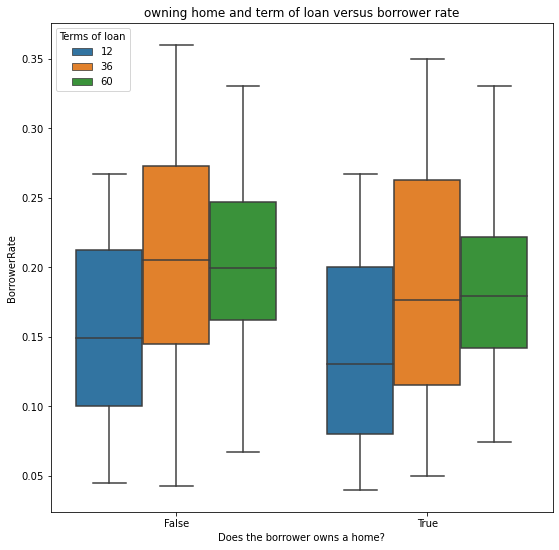

In [95]:
plt.subplots( figsize = [9,9])

sb.boxplot(data = df , y = 'BorrowerRate' , x='IsBorrowerHomeowner',hue = 'Term') 
plt.legend(loc=0,title="Terms of loan")
plt.xlabel('Does the borrower owns a home?');
plt.title('owning home and term of loan versus borrower rate');

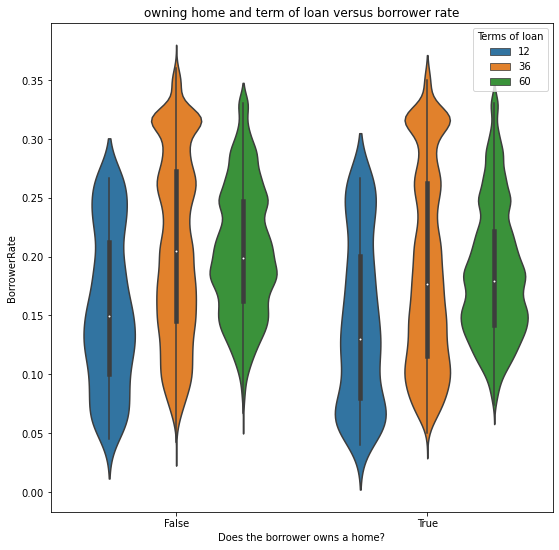

In [96]:
plt.subplots( figsize = [9,9])

sb.violinplot(data = df , y = 'BorrowerRate' , x='IsBorrowerHomeowner',hue = 'Term')
plt.legend(loc=0 , title="Terms of loan");
plt.xlabel('Does the borrower owns a home?');
plt.title('owning home and term of loan versus borrower rate');

## Distribution of BorrowerRate vesrsus prosperscore indexed by term

>this plot tells us the simple fact infront of us that a higher prosperscore means a lower borrower rate and another fact if you take a certain prosperscore but you had chosen 12 term loan you get a borrower rate lower than taking the same prosperscore but chose 36 or 60 terms loan

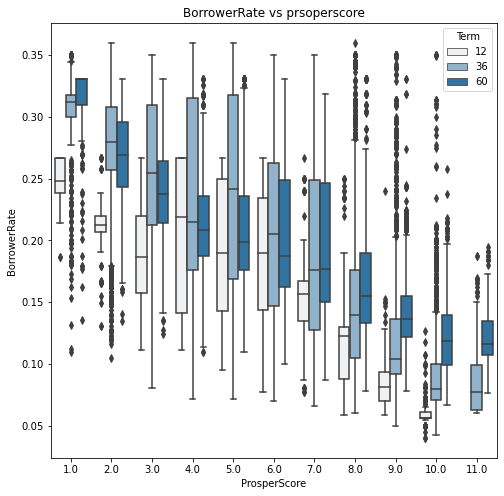

In [97]:
plt.figure(figsize=[8,8])
sb.boxplot(data = df , x = 'ProsperScore' , y ='BorrowerRate',hue='Term',color=sb.color_palette()[0])
plt.title('BorrowerRate vs prsoperscore');

## Distribution of the listing categories versus the borrower rate
> this distribution tells us what is the average borrower rate for each category and does certain categories have a lower average rate than others.

>in the next plot 
* 1 is Debt Consolidation
* 2 is Home Improvement. 

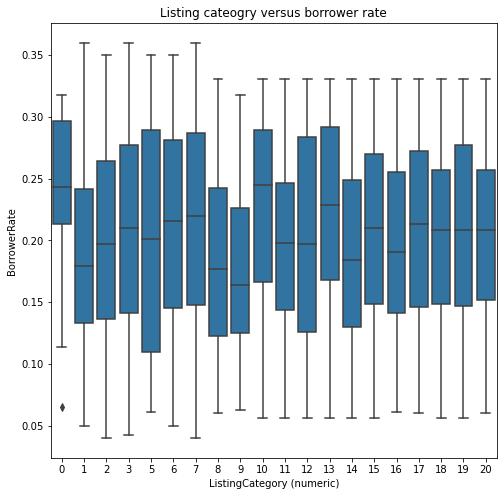

In [98]:
plt.figure(figsize=[8,8])

sb.boxplot(data = df , x ='ListingCategory (numeric)' , y='BorrowerRate',color=sb.color_palette()[0])
plt.title('Listing cateogry versus borrower rate');

## Conclusion 
>In order to get a lower borrower rate you should have the following
* you should apply for a 12 term loan
* you should own your home
* the reason for your loan should be a debt consolidation or home improvements

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!